In [1]:
!pip install tensorflow

In [3]:

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
#from keras.utils import np_utils

In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

num_train_samples = X_train.shape[0]
num_test_samples = y_test.shape[0]
image_height = X_train.shape[1]
image_width = X_train.shape[2]
num_channels = X_train.shape[3]

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))
print("y_train sample 5 value: " + str(y_train[5]))
print("Train samples: " + str(num_train_samples))
print("Test samples: " + str(num_test_samples))
print("Image height: " + str(image_height))
print("Image width: " + str(image_width))
print("Number of channels: " + str(num_channels))
  
X_train = X_train / 255   # values [0..1] improve results
X_test = X_test / 255
    
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

print("categorical y_train shape: " + str(y_train.shape))
print("categorical y_train sample 5 value: " + str(y_train[5]))
num_classes = y_test.shape[1]
print("Number of classes: " + str(num_classes))

X_train.shape: (50000, 32, 32, 3)
X_test.shape: (10000, 32, 32, 3)
y_train.shape: (50000, 1)
y_test.shape: (10000, 1)
y_train sample 5 value: [86]
Train samples: 50000
Test samples: 10000
Image height: 32
Image width: 32
Number of channels: 3
categorical y_train shape: (50000, 100)
categorical y_train sample 5 value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Number of classes: 100


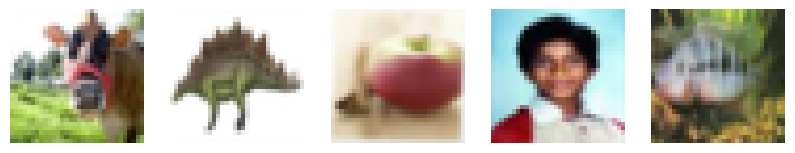

In [6]:
#print 5 first images
import matplotlib.pyplot as plot
import numpy as np
fig, axes = plot.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(image_height,image_width,num_channels)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))  
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(num_classes, activation='softmax'))

print(model.summary())

EPOCHS = 30
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=512, verbose=0)

#plot(history)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,684 (373.77 KB)

 Trainable params: 95,684 (373.77 KB)

 Non-trainable params: 0 (0.00 B)

None


The provided code is building and training a Convolutional Neural Network (CNN) model using the Keras API from TensorFlow for a classification task.

The model is initialized using the `Sequential()` function, which allows you to create models layer-by-layer in a step-by-step fashion.

The first layer is a 2D convolutional layer (`Conv2D`) with 16 filters, each of size 3x3. The activation function used is 'relu' (Rectified Linear Unit), and the `input_shape` parameter specifies the shape of the input image. 

The second layer is a 2D max pooling layer (`MaxPooling2D`) with a pool size of 2x2. This layer reduces the spatial dimensions (height, width) of the input volume.

The third layer is another 2D convolutional layer but with 32 filters. 

The fourth layer is another 2D max pooling layer, similar to the second layer.

The fifth layer is another 2D convolutional layer with 64 filters.

The sixth layer is a flatten layer (`Flatten`), which converts the 2D matrix data into a 1D vector. This is necessary because fully connected layers (like the upcoming Dense layers) expect input in a 1D format.

The seventh layer is a fully connected layer (`Dense`) with 64 neurons and 'relu' activation function.

The eighth layer is another fully connected layer with a number of neurons equal to the number of classes in the classification task. The activation function of the final layer is 'softmax', which makes it suitable for multi-class classification.

The `model.summary()` function is then called to print a summary representation of the model.

The model is then compiled with the 'categorical_crossentropy' loss function, 'rmsprop' optimizer, and it will measure 'accuracy' during training.

Finally, the model is trained using the `fit` method on the training data with a specified number of epochs and batch size. The `validation_data` parameter is set to the test data to evaluate the loss and any model metrics at the end of each epoch. The `verbose` parameter is set to 0, which means the training process will not output any messages.

The `plot` function is then called with the history of the model training to visualize the training process. This function is commented out in the provided code, so it will not be executed.

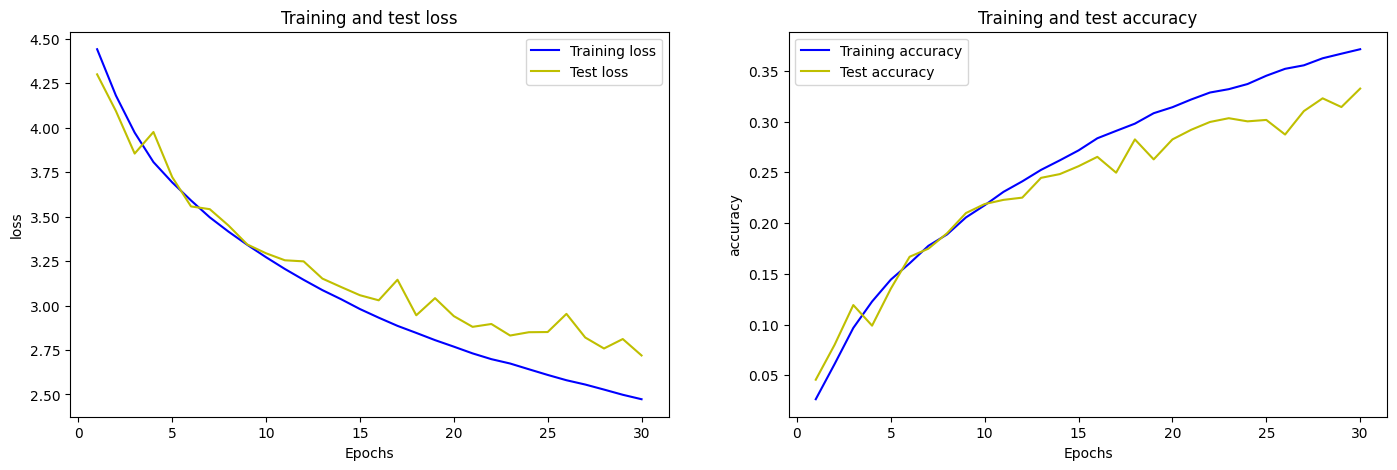

Loss: 2.718717336654663
Accuracy: 0.3325999975204468


In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot(h):
    LOSS = 0; ACCURACY = 1
    training = np.zeros((2,EPOCHS)); testing = np.zeros((2,EPOCHS))
    training[LOSS] = h.history['loss']
    testing[LOSS] = h.history['val_loss']    # validation loss
    training[ACCURACY] = h.history['accuracy']
    testing[ACCURACY] = h.history['val_accuracy']  # validation accuracy

    epochs = range(1,EPOCHS+1)
    fig, axs = plt.subplots(1,2, figsize=(17,5))
    for i, label in zip((LOSS, ACCURACY),('loss', 'accuracy')):   
        axs[i].plot(epochs, training[i], 'b-', label='Training ' + label)
        axs[i].plot(epochs, testing[i], 'y-', label='Test ' + label)
        axs[i].set_title('Training and test ' + label)
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel(label)
        axs[i].legend()
    plt.show()
    loss, accuracy = model.evaluate(X_test,y_test,verbose=0)
    print("Loss: " + str(loss))
    print("Accuracy: " + str(accuracy))

plot(history)

The provided Python code is a function named [`plot`](command:_github.copilot.openSymbolInFile?%5B%22..%2F..%2Fanaconda3%2Fenvs%2F3.11%2Flib%2Fpython3.11%2Fsite-packages%2Fmatplotlib%2Fpyplot.py%22%2C%22plot%22%5D "../../anaconda3/envs/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py") that is used to visualize the training and testing loss and accuracy of a machine learning model over a number of epochs. The function takes one argument `h` which is expected to be the history object returned by the `fit` method of a Keras model.

The function first defines two constants, `LOSS` and `ACCURACY`, and assigns them the values 0 and 1 respectively. These constants are used as indices to store and retrieve loss and accuracy data from numpy arrays.

Next, it creates two 2D numpy arrays, `training` and `testing`, with dimensions (2, EPOCHS). The first dimension corresponds to loss and accuracy, and the second dimension corresponds to the number of epochs. The [`zeros`](command:_github.copilot.openSymbolInFile?%5B%22..%2F..%2Fanaconda3%2Fenvs%2F3.11%2Flib%2Fpython3.11%2Fsite-packages%2Fnumpy%2Fcore%2Fmultiarray.pyi%22%2C%22zeros%22%5D "../../anaconda3/envs/3.11/lib/python3.11/site-packages/numpy/core/multiarray.pyi") function from numpy is used to initialize these arrays with zeros.

The function then populates the `training` and `testing` arrays with the loss and accuracy data from the history object. The loss data is stored at index 0 and the accuracy data is stored at index 1. The 'loss', 'val_loss', 'accuracy', and 'val_accuracy' keys are used to retrieve this data from the history object.

The function then creates a range of epochs using the [`range`](command:_github.copilot.openSymbolInFile?%5B%22..%2F..%2F.vscode%2Fextensions%2Fms-python.vscode-pylance-2024.3.1%2Fdist%2Ftypeshed-fallback%2Fstdlib%2Fbuiltins.pyi%22%2C%22range%22%5D "../../.vscode/extensions/ms-python.vscode-pylance-2024.3.1/dist/typeshed-fallback/stdlib/builtins.pyi") function. This range is used as the x-axis in the plots.

Next, the function creates a 1x2 subplot using matplotlib's [`subplots`](command:_github.copilot.openSymbolInFile?%5B%22..%2F..%2Fanaconda3%2Fenvs%2F3.11%2Flib%2Fpython3.11%2Fsite-packages%2Fmatplotlib%2Fpyplot.py%22%2C%22subplots%22%5D "../../anaconda3/envs/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py") function. This creates two plots side by side.

The function then loops over the indices and labels for loss and accuracy using the [`zip`](command:_github.copilot.openSymbolInFile?%5B%22..%2F..%2F.vscode%2Fextensions%2Fms-python.vscode-pylance-2024.3.1%2Fdist%2Ftypeshed-fallback%2Fstdlib%2Fbuiltins.pyi%22%2C%22zip%22%5D "../../.vscode/extensions/ms-python.vscode-pylance-2024.3.1/dist/typeshed-fallback/stdlib/builtins.pyi") function. For each index and label, it plots the training and testing data on the corresponding subplot. It also sets the title, x-label, y-label, and legend for each subplot.

After plotting the data, the function displays the plots using the [`show`](command:_github.copilot.openSymbolInFile?%5B%22..%2F..%2Fanaconda3%2Fenvs%2F3.11%2Flib%2Fpython3.11%2Fsite-packages%2Fmatplotlib%2Fpyplot.py%22%2C%22show%22%5D "../../anaconda3/envs/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py") function from matplotlib.

Finally, the function evaluates the model on the test data using the `evaluate` method of the model. It prints the loss and accuracy of the model on the test data.

The function is then called with `history` as the argument, which is expected to be the history object returned by the `fit` method of a Keras model.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 96)       │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 284,420 (1.08 MB)

 Trainable params: 284,420 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

None


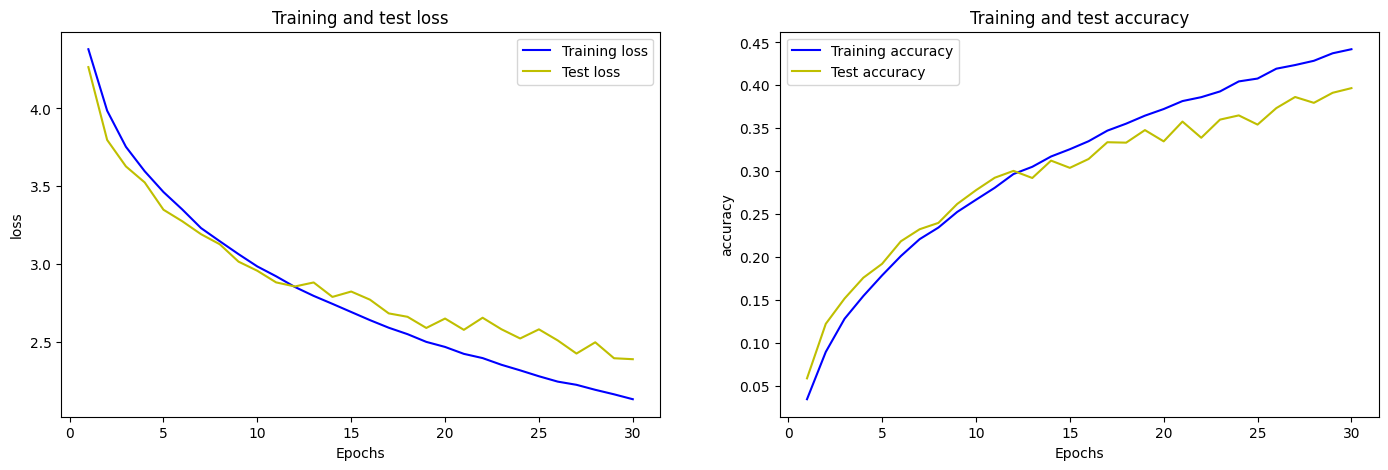

Loss: 2.389343023300171
Accuracy: 0.3968000113964081


In [11]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(image_height,image_width,num_channels)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(96, (3,3), activation='relu'))  
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(num_classes, activation='softmax'))

print(model.summary())

EPOCHS = 30
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=512, verbose=0)
plot(history)


The provided Python code is using the Keras API from TensorFlow to build, compile, and train a Convolutional Neural Network (CNN) model for image classification. 

The `Sequential` model is initialized and then layers are added to it. The first layer is a 2D convolutional layer (`Conv2D`) with 32 filters, each of size 3x3. The activation function used is 'relu' (Rectified Linear Unit), and the `input_shape` parameter specifies the shape of the input image. 

The second layer is a 2D max pooling layer (`MaxPooling2D`) with a pool size of 2x2. This layer reduces the spatial dimensions (height, width) of the input volume.

The third layer is another 2D convolutional layer but with 64 filters. 

The fourth layer is another 2D max pooling layer, similar to the second layer.

The fifth layer is another 2D convolutional layer with 96 filters.

The sixth layer is a dropout layer (`Dropout`) with a rate of 0.4, which randomly sets a fraction of input units to 0 at each update during training time, helping to prevent overfitting.

The seventh layer is a flatten layer (`Flatten`), which converts the 2D matrix data into a 1D vector, and two Dense layers. The final Dense layer uses the softmax activation function, making it suitable for multi-class classification.

The `model.summary()` function is then called to print a summary representation of the model.

The model is then compiled with the 'categorical_crossentropy' loss function, the 'rmsprop' optimizer, and 'accuracy' as the metric to be evaluated during training and testing.

The model is trained using the `fit` method, with the training data `X_train` and `y_train`, and the validation data `X_test` and `y_test`. The number of epochs (complete passes through the entire training dataset) is set to 30, and the batch size (number of samples per gradient update) is set to 512. The `verbose` parameter is set to 0, which means the training process will not output any logs.

The code then plots the training history using the `plot` function. This function generates a plot of the training and validation accuracy and loss over the epochs. It also evaluates the model on the test data and prints the loss and accuracy.

In [ ]:
#Complete TODO sections in the code below